##   亲属关系判别模型

In [5]:
%matplotlib  inline

In [1]:
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, auc,roc_auc_score,precision_score,accuracy_score,f1_score,recall_score,auc
import pandas as pd
import numpy as np
# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional     scklearn functions
from sklearn.grid_search import GridSearchCV 
import gc
# used_feat=pd.read_csv('feature_importance.csv',index_col=0)
# use_cols=used_feat[used_feat.imv>5].index.values
rel_df=pd.read_csv('train_df_std0320_20w.csv',index_col=0)


target=rel_df.is_rel
rel_df1=rel_df.ix[:,:-1]
# rel_df=rel_df1.ix[:,use_cols]
X_train, X_test, y_train, y_test = train_test_split(rel_df1, target)
# del target
# del rel_df
# gc.collect()
# dtrain = xgb.DMatrix(X_train, y_train)
# dvalid = xgb.DMatrix(X_test, y_test)

### 1.逻辑回归

In [2]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train.values, y_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
y_pred=lr.predict(X_test)
print roc_auc_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print accuracy_score(y_test,y_pred)
print f1_score(y_test,y_pred)
print recall_score(y_test,y_pred)

0.614752969645
0.614174179008
0.61476
0.613088542504
0.612006737247


### 2 支持向量机

In [9]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
y_pred=clf.predict(X_test)
print roc_auc_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print accuracy_score(y_test,y_pred)
print f1_score(y_test,y_pred)
print recall_score(y_test,y_pred)

0.615146445984
0.627306273063
0.61496
0.60018275461
0.575307560616


In [10]:
# y_pred_prob = lr.predict_proba(X_test)
 = metrics.roc_curve( X_test, y_test)
# plt.plot(fpr, tpr)
# # plt.xlim([0.0, 1.0])
# # plt.ylim([0.0, 1.0])
# plt.title('ROC curve for diabetes classifier')
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
# plt.grid(True)

ValueError: bad input shape (50000, 72)

In [5]:
from sklearn import metrics
scores = cross_validation.cross_val_score(lr, X_test, y_test, cv=5)

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

(5,)

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [31]:
from sklearn.cross_validation  import StratifiedKFold
cv = StratifiedKFold(, n_folds=6)  

(5,)

### 3.随机森林

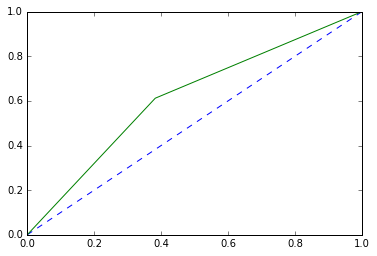

In [27]:
%matplotlib  inline

import matplotlib.pylab as plt
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_pred)
line1, = plt.plot([0, 1], label="Line 1", linestyle='--')
plt.plot(fpr, tpr)
# plt.plot(fprb, tprb)
# plt.plot(fprc, tprc)
# plt.plot(fprd, tprd)
# plt.plot(fpre, tpre)
plt.show()

In [29]:
metrics.auc(fpr,tpr)

0.61475296964506188